## 1. 准备数据集

## 方法
1. 弄清楚问题
1. 收集数据
1. 探索数据分析
1. 特征工程
1. 建模
1. 测试

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()


## 2. 收集数据

In [2]:
import pandas as pd
train_data = pd.read_csv('./datasets/titanic/train.csv')
test_data = pd.read_csv('./datasets/titanic/test.csv')
train_data.shape, test_data.shape

((891, 12), (418, 11))

## 3. 探索分析数据

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

从上面可以看出数据中存在缺失值：
- Age, float64
- Cabin, string
- Embarked, string
- Fare, string

定一个方法来看看每个特征在幸存者的影响如何

In [9]:
def bar_chart(feature:str) -> None:
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df:pd.DataFrame = pd.DataFrame([survived, dead])
    df.index=['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))
    return

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


查看下面的特征的影响
- Pclass
- Sex
- Age
- SibSp
- Parch
- Cabin
- Embarked

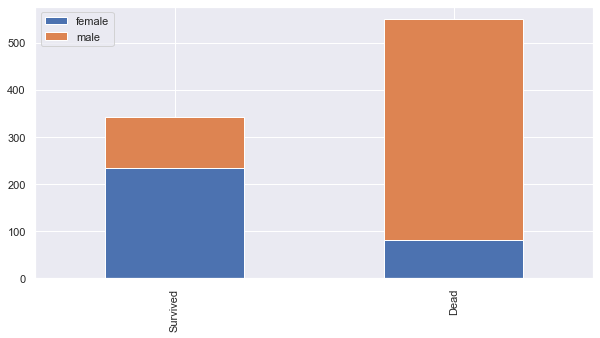

In [11]:
bar_chart('Sex')

从上面可以看到male挂的比例远远大于female，**所以在分析的时候Sex这个分类属性一定要考虑**

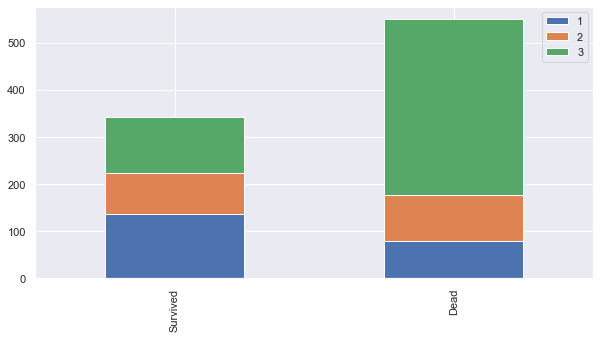

In [12]:
bar_chart('Pclass')

- 1st仓的生还率较大
- 3rd仓挂的概率比较大
- 2nd仓挂的概率也是比较大

**所以在分析的时候也要把Pclass的分类属性考虑进去**

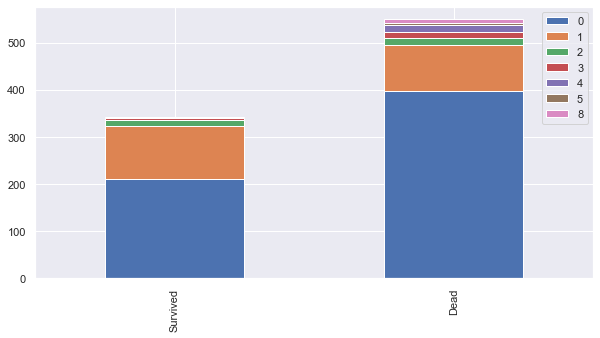

In [13]:
bar_chart('SibSp')

- 可以看到带有配偶或者兄弟姐妹的生还的概率比较大
- 独自一个人上船的话，挂的概率比较大


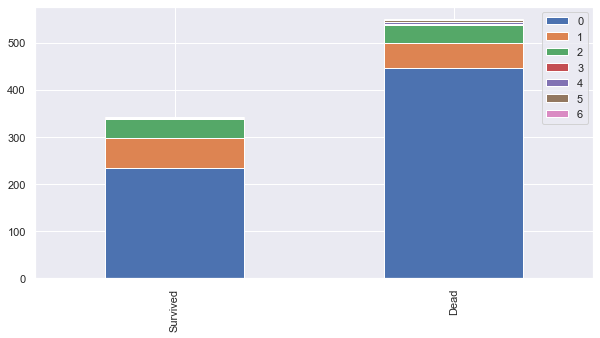

In [14]:
bar_chart('Parch')

- 带着父母或者孩子登船的生还的概率比较高
- 独自一人登船的话，挂的概率比较大

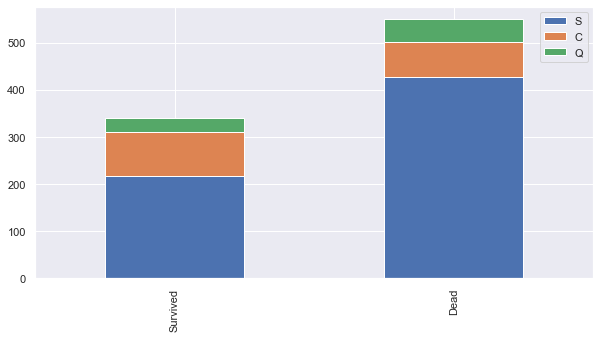

In [15]:
bar_chart('Embarked')

- 从S和Q处登船的挂的概率比较大
- 从C处登船的生还的概率比较大

## 4. 特征工程设计

### 4.1 Title
我们注意到生存的几率是与subject的Sex有关的，Name这属性我们用不到，但是Name里面包含了一些称为，可是看看这些称谓和target之间有没有关系

In [16]:
train_data_copied = train_data.copy()
train_data_copied['Title'] = train_data_copied['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train_data_copied.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


这里有太多的称呼了，我们可以做一下mapping

In [19]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
train_data_copied['Title'] = train_data_copied['Title'].map(title_mapping)
train_data_copied.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
train_data_copied['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

In [21]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 使用Pipeline思想来进行处理

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
class AddTitleAttribute():
    """
    定义一个转换器，为dataset添加一个Title属性
    """
    def __init__(self, title_mapping):
        self.title_mapping = title_mapping
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        tranformed=X.copy()
        tranformed['Title'] = tranformed['Name'].str.extract('([A-Za-z]+)\.', expand=False)
        tranformed['Title']= tranformed['Title'].map(self.title_mapping)
        return tranformed

In [23]:
add_title = AddTitleAttribute(title_mapping)
add_title.transform(train_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4.2 Sex


In [25]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Sex使用正常的分类标签处理即可

### 4.3 Age

In [26]:
train_data['Age'].value_counts().sum()

714

Age有缺失值，需要填充使用中位数填充，这里我们不使用以往的整体中位数，而是使用更加Title划分的中位数

In [27]:
titled_train_data = add_title.transform(train_data)
titled_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
class FillAgeNanEstimator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        transformed = X.copy()
        transformed["Age"].fillna(transformed.groupby("Title")["Age"].transform("median"), inplace=True)
        return transformed

In [30]:
fill_age_estimator = FillAgeNanEstimator()
age_title_train_data=fill_age_estimator.transform(titled_train_data)
age_title_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [31]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 看看年龄和生还的分布情况

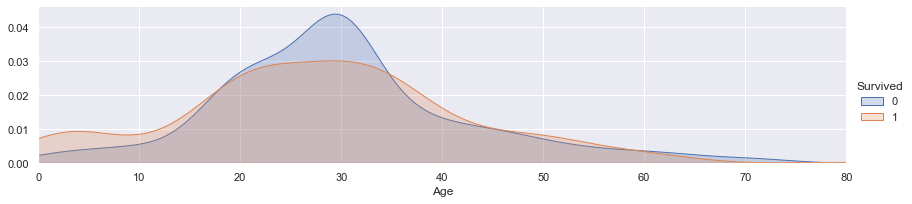

In [32]:
facet = sns.FacetGrid(age_title_train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, age_title_train_data['Age'].max()))
facet.add_legend()
plt.show() 

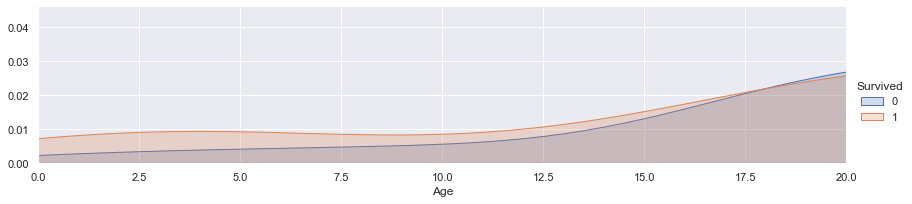

In [33]:
facet = sns.FacetGrid(age_title_train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, age_title_train_data['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)
plt.show() 

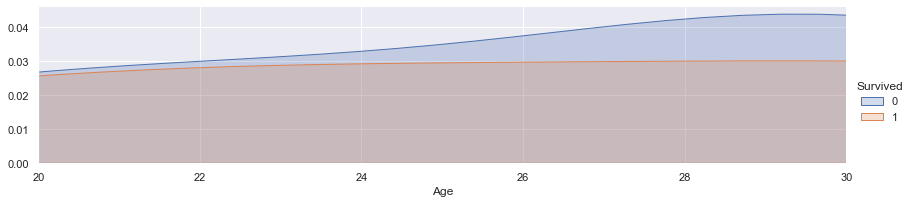

In [34]:
facet = sns.FacetGrid(age_title_train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, age_title_train_data['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)
plt.show() 

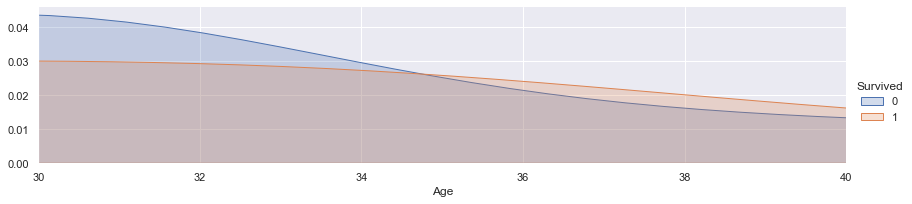

In [35]:
facet = sns.FacetGrid(age_title_train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, age_title_train_data['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)
plt.show() 

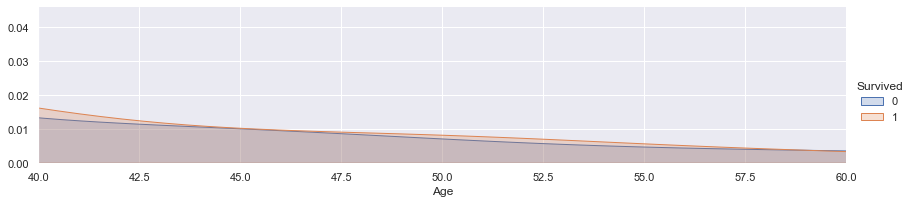

In [36]:
facet = sns.FacetGrid(age_title_train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, age_title_train_data['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)
plt.show() 

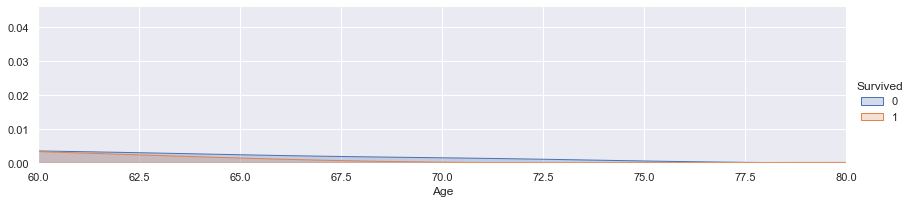

In [37]:
facet = sns.FacetGrid(age_title_train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, age_title_train_data['Age'].max()))
facet.add_legend()
plt.xlim(60, age_title_train_data['Age'].max())
plt.show() 

In [38]:
age_title_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


#### 对年龄进行分组
- < 16 child
- 16~26 young
- 26~36 adult
- 36~62 mid-age
- 60+ senior

In [39]:
class AgeGroupedEstimator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        transformed = X.copy()
        for index, value in enumerate(transformed['Age']):
            if value <= 16:
                transformed['Age'][index] = 'child'
            elif (value > 16) & (value <= 26):
                transformed['Age'][index] = 'young'
            elif (value > 26) & (value <= 36):
                transformed['Age'][index] = 'adult'
            elif (value > 36) & (value <= 62):
                transformed['Age'][index] = 'mid-age'
            else:
                transformed['Age'][index] = 'senior'
        # transformed.loc[ transformed['Age'] <= 16, 'Age'] = 'child'
        # transformed.loc[(transformed['Age'] > 16) & (transformed['Age'] <= 26), 'Age'] = 'young',
        # transformed.loc[(transformed['Age'] > 26) & (transformed['Age'] <= 36), 'Age'] = 'adult',
        # transformed.loc[(transformed['Age'] > 36) & (transformed['Age'] <= 62), 'Age'] = 'mid-age',
        # transformed.loc[ transformed['Age'] > 62, 'Age'] = 'senior'
        return transformed


In [40]:
age_grouped_tranformer = AgeGroupedEstimator()
age_grouped_title_train_data = age_grouped_tranformer.transform(age_title_train_data)
age_grouped_title_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,young,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,mid-age,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,young,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,adult,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,adult,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,adult,0,0,211536,13.0000,NaN,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,young,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,young,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,young,0,0,111369,30.0000,C148,C,0


### 4.4 Embarked

In [41]:
age_grouped_title_train_data['Embarked'].isnull().sum()

2

In [42]:
test_data['Embarked'].isnull().sum()

0

Embarked缺失了两个值，可是使用的最多的值填充`strategy='most_frequent'`

### 4.5 Fare

In [43]:
age_grouped_title_train_data['Fare'].isnull().sum()

0

In [44]:
test_data['Fare'].isnull().sum()

1

Embarked缺失的值，可是使用的最多的值填充`strategy='median'`

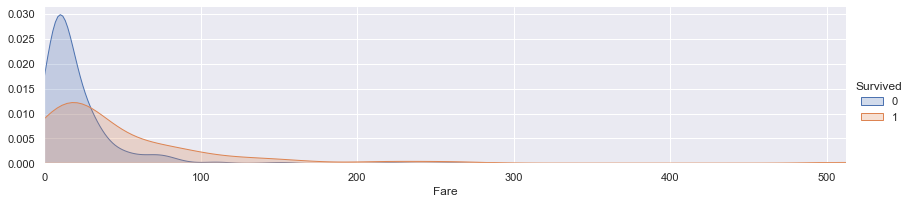

In [45]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 30.0)

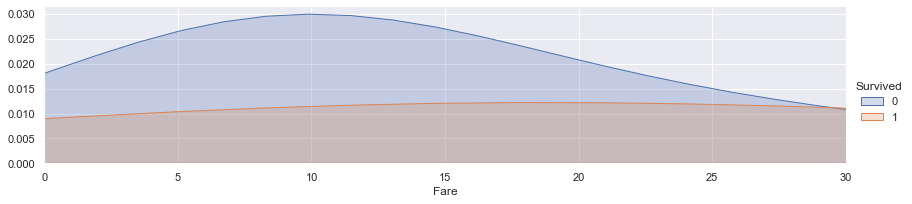

In [46]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(30.0, 100.0)

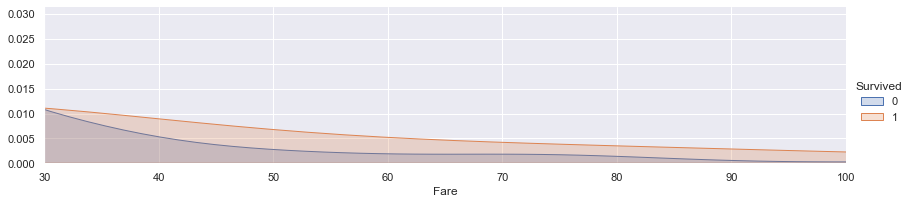

In [47]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
plt.xlim(30, 100)

可以看到0~30， 30~100, 100+可以分为三个类别

### 4.6 Cabin

In [48]:
train_data['Cabin'].isnull().sum()

687

Cabin属性丢失的太多了，没有补充的意义，所以直接丢弃掉算了

### 4.7 FamilySize
由于上面可以看出SinSp和Parch的大小与Survived之间的关系比较大，索性我们将其合并为一个FamilySize的属性

In [49]:
train_data['SibSp'].isnull().sum()

0

In [50]:
train_data['Parch'].isnull().sum()

0

In [51]:
test_data['SibSp'].isnull().sum(), test_data['Parch'].isnull().sum()

(0, 0)

In [52]:
familysize_ge_grouped_title_train_data = age_grouped_title_train_data.copy()
familysize_ge_grouped_title_train_data['FamilySize'] = familysize_ge_grouped_title_train_data['SibSp'] + familysize_ge_grouped_title_train_data['Parch'] + 1
familysize_ge_grouped_title_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,young,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,mid-age,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,young,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,adult,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,adult,0,0,373450,8.0500,NaN,S,0,1


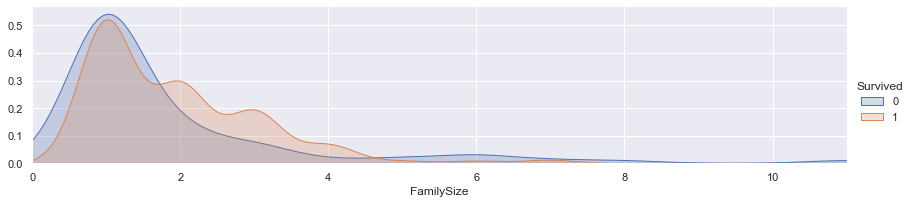

In [53]:
facet = sns.FacetGrid(familysize_ge_grouped_title_train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, familysize_ge_grouped_title_train_data['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)
plt.show()

In [54]:
train_data['Name'].isnull().sum(), test_data['Name'].isnull().sum()

(0, 0)

## 5. Pipeline

1. 依据数据集的Name属性创建Title属性

In [55]:
## 选择数据集
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion



### 5.1 增加Title的pipeline

In [57]:
class TitleMappingEstimator(BaseEstimator, TransformerMixin):
    def __init__(self, title_map):
        self.title_map = title_map
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        R = X.copy()
        R['Title'] = R['Name'].str.extract('([A-Za-z]+)\.', expand=False)
        R['Title']=R['Title'].map(self.title_map)
        return R

In [58]:
title_mapping

{'Mr': 0,
 'Miss': 1,
 'Mrs': 2,
 'Master': 3,
 'Dr': 3,
 'Rev': 3,
 'Col': 3,
 'Major': 3,
 'Mlle': 3,
 'Countess': 3,
 'Ms': 3,
 'Lady': 3,
 'Jonkheer': 3,
 'Don': 3,
 'Dona': 3,
 'Mme': 3,
 'Capt': 3,
 'Sir': 3}

In [59]:
title_pipeline = Pipeline([
    ('title_map', TitleMappingEstimator(title_mapping)),
    # ('title_fillna', SimpleImputer(strategy='most_frequent')) #使用Simple之后返回的是一个ndarray
])

In [60]:
titles = title_pipeline.fit_transform(train_data)
titles

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [61]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 5.2 Age
#### 5.2.1 根据title来填充age
#### 5.2.1 根据Age来分组

In [62]:
class AgeFillNanEstimator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X["Age"].fillna(X.groupby("Title")["Age"].transform("median"), inplace=True)
        return X
class AgeGroupedEstimator2(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        for index, value in enumerate(X['Age']):
            if value <= 16:
                X['Age'][index] = 'child'
            elif (value > 16) & (value <= 26):
                X['Age'][index] = 'young'
            elif (value > 26) & (value <= 36):
                X['Age'][index] = 'adult'
            elif (value > 36) & (value <= 62):
                X['Age'][index] = 'mid-age'
            else:
                X['Age'][index] = 'senior'
        # transformed.loc[ transformed['Age'] <= 16, 'Age'] = 'child'
        # transformed.loc[(transformed['Age'] > 16) & (transformed['Age'] <= 26), 'Age'] = 'young',
        # transformed.loc[(transformed['Age'] > 26) & (transformed['Age'] <= 36), 'Age'] = 'adult',
        # transformed.loc[(transformed['Age'] > 36) & (transformed['Age'] <= 62), 'Age'] = 'mid-age',
        # transformed.loc[ transformed['Age'] > 62, 'Age'] = 'senior'
        return X


In [63]:
age_pipeline = Pipeline([
    ('title_pipeline', title_pipeline),
    ('age_fillna', AgeFillNanEstimator()),
    ('age_grouped', AgeGroupedEstimator2())
])

In [64]:


age_pipeline.fit_transform(train_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,young,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,mid-age,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,young,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,adult,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,adult,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,adult,0,0,211536,13.0000,NaN,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,young,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,young,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,young,0,0,111369,30.0000,C148,C,0


In [65]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 5.3 FamilySize

In [66]:
class FamilySizeAttributeEstimator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        R = X.copy()
        R['FamilySize'] = R['SibSp'] + R['Parch'] + 1
        return R

In [67]:
preprocess_pipeline = Pipeline([
    ('title_pipeline', title_pipeline),
    ('age_fillna', AgeFillNanEstimator()),
    ('age_grouped', AgeGroupedEstimator2()),
    ('add_familysize', FamilySizeAttributeEstimator())
])

In [68]:
preprocess_pipeline.fit_transform(train_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,young,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,mid-age,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,young,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,adult,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,adult,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,adult,0,0,211536,13.0000,NaN,S,3,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,young,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,young,1,2,W./C. 6607,23.4500,NaN,S,1,4
889,890,1,1,"Behr, Mr. Karl Howell",male,young,0,0,111369,30.0000,C148,C,0,1


In [69]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 5.4 数字的处理

In [70]:
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('num_selector', DataFrameSelector(['Fare'])),
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

### 5.5 分类特征

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
cat_pipeline = Pipeline([
    ('cat_selector', DataFrameSelector(['Pclass', 'Sex', 'Age', 'Embarked', 'Title', 'FamilySize'])),
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot_encoder', OneHotEncoder(sparse=False))
])

cat_pipeline.fit_transform(preprocess_pipeline.fit_transform(train_data))

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

### 5.6 特征结合

In [73]:
from sklearn.pipeline import FeatureUnion
feature_pipeline = FeatureUnion(transformer_list=[
    # ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])


In [74]:
train_data_processed = preprocess_pipeline.fit_transform(train_data)
train_data_processed


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,young,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,mid-age,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,young,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,adult,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,adult,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,adult,0,0,211536,13.0000,NaN,S,3,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,young,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,young,1,2,W./C. 6607,23.4500,NaN,S,1,4
889,890,1,1,"Behr, Mr. Karl Howell",male,young,0,0,111369,30.0000,C148,C,0,1


In [75]:
X_train = feature_pipeline.fit_transform(train_data_processed)
X_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [76]:
y_train = train_data_processed['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [77]:
test_data_processed = preprocess_pipeline.fit_transform(test_data)
test_data_processed

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",male,adult,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,mid-age,1,0,363272,7.0000,NaN,S,2,2
2,894,2,"Myles, Mr. Thomas Francis",male,mid-age,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",male,adult,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,young,1,1,3101298,12.2875,NaN,S,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,adult,0,0,A.5. 3236,8.0500,NaN,S,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,mid-age,0,0,PC 17758,108.9000,C105,C,3,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,mid-age,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1
416,1308,3,"Ware, Mr. Frederick",male,adult,0,0,359309,8.0500,NaN,S,0,1


In [78]:
X_test = feature_pipeline.fit_transform(test_data_processed)
X_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

## 6. 选择模型

### 6.1 SVC

In [82]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
svc_clf = SVC()
svm_scores = cross_val_score(svc_clf, X_train, y_train, scoring='accuracy', cv=10, verbose=3)
svm_scores.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[CV]  ................................................................
[CV] .................................... , score=0.833, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.843, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.753, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.899, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.854, total=   0.0s
[CV]  ...........................................

0.8260299625468164

### 6.2 RandomForest

In [80]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, scoring='accuracy', cv=5, verbose=3)
forest_scores.mean()

[CV]  ................................................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] .................................... , score=0.765, total=   0.2s
[CV]  ................................................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[CV] .................................... , score=0.803, total=   0.2s
[CV]  ................................................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[CV] .................................... , score=0.809, total=   0.3s
[CV]  ................................................................
[CV] .................................... , score=0.787, total=   0.3s
[CV]  ................................................................
[CV] .................................... , score=0.826, total=   0.5s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elaps

0.7980164459230432

### 6.3 KNeighborsClassifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, scoring='accuracy', cv=5, verbose=3)
knn_scores.mean()

[CV]  ................................................................
[CV] .................................... , score=0.793, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.792, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.758, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.781, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.826, total=   0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elaps

0.7901198920343984

### 6.4 GrideSearchCV找寻最佳参数

In [90]:
from sklearn.model_selection import GridSearchCV
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
grid_search = GridSearchCV(SVC(), params_grid, cv=5, verbose=3, n_jobs=-1)

In [91]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             verbose=3)

In [92]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

## 7. 预测

In [93]:
svc_clf = SVC(**grid_search.best_params_)
svc_clf.fit(X_train, y_train)

SVC(C=1000, gamma=0.001)

In [94]:
predict = svc_clf.predict(X_test)
len(predict)

418

In [95]:
predict_data = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predict
})

predict_data.to_csv('submission.csv', index=False)